In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating the Return Problem

In [39]:
from QFP.classes import return_problem
#Create a Hamiltonian to study
L=200
H=np.diagflat(np.ones(L-1),1)+np.diagflat(np.ones(L-1),-1)
#This Hamiltonian represents a 1D lattice with nearest neighbor hopping, i.e. a tight binding Hamiltonian
#Create the initial state
psi_0=np.zeros(L)
psi_0[L//2]=1                   #Represents a partice place at the center of the lattice
#Initialize a class such that the methods can be applied to it
return_class=return_problem(H,psi_0,tau=0.001,N=1e4)            #Default tau=1 (sampling rate), N=1e4 (how deep in time we go)

/home/xps/anaconda3/envs/science/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


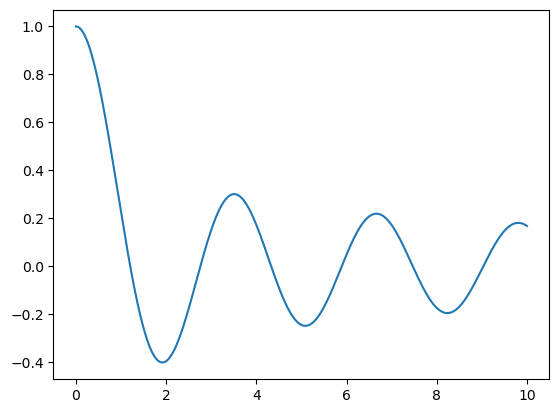

In [40]:
#Loschmidt amplitude
from QFP.functions import probability_amplitude
loschmidt_amplitude=probability_amplitude(return_class)             #This function calculates the probability amplitude of returning to the initial state at time n*tau
x=np.arange(1,len(loschmidt_amplitude)+1,1)*0.001
plt.plot(x,loschmidt_amplitude)

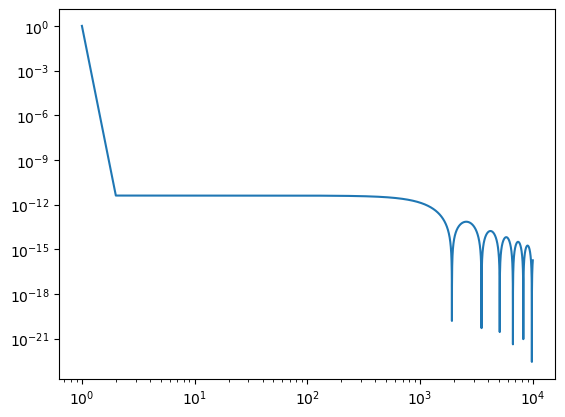

In [41]:
#First Detection Amplitude
from QFP.functions import first_detection_amplitude
phi_n=first_detection_amplitude(return_class)                       #This function calculates the probability amplitude of first detection at the nth step
F_n=np.abs(phi_n)**2
x=np.arange(1,len(phi_n)+1,1)
plt.loglog(x,F_n)

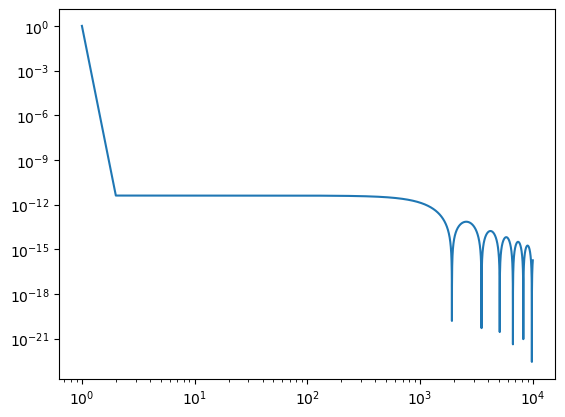

In [42]:
#The first detection amplitude does not require a class, it can compute the first detection amplitude given a loschmidt echo
from QFP.functions import first_detection_amplitude
phi_n=first_detection_amplitude(amplitudes=loschmidt_amplitude)                       #This function calculates the probability amplitude of first detection at the nth step
F_n=np.abs(phi_n)**2
x=np.arange(1,len(phi_n)+1,1)
plt.loglog(x,F_n)

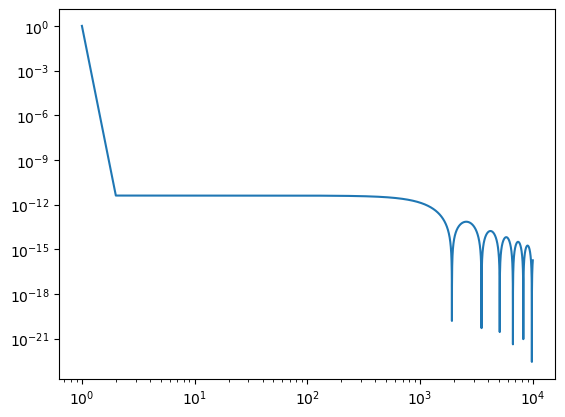

In [43]:
#First Detection Probability
from QFP.functions import first_detection_probability
F_n=first_detection_probability(return_class)                      #This function calculates the probability of first detection at the nth step
x=np.arange(1,len(F_n)+1,1)
plt.loglog(x,F_n)

## Multiple realizations of Hamiltonians

In [1]:
'''
The best use of this package is that it can handle a list of systems at the same time. The code is parallelized. This useful for comparing multiple systems at the same time or for studying disordered systems, this allows the use of parallelism and taking the disorder average at the end.
'''
#Create a list of Hamiltonians, Disordered Problem
from QFP.classes import multiple_return_problems
import numpy as np
H_list=[]
L=100
for _ in range(100):
    H=np.random.normal(0,1,L)
    H=np.diagflat(np.ones(L-1),1)+np.diagflat(np.ones(L-1),-1)+np.diagflat(H,0)
    H_list.append(H)
psi_0=np.zeros(L)
psi_0[L//2]=1
#Initialize the class

In [2]:
return_classes=multiple_return_problems(H_list,psi_0,tau=0.2,N=1e4)

In [3]:
from QFP.functions import first_detection_probability
F_n=first_detection_probability(return_classes)      #This function calculates the probability of first detection at the nth step

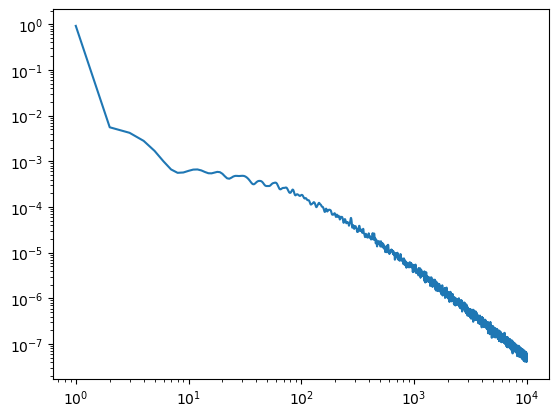

In [4]:
import matplotlib.pyplot as plt
x=np.arange(1,F_n.shape[1]+1,1)
plt.loglog(x,np.mean(F_n,axis=0))

In [3]:
#Comparing Hamiltonians Problem
from QFP.classes import multiple_return_problems
L=1000
H1=np.diagflat(np.ones(L-1),1)+np.diagflat(np.ones(L-1),-1)         #Disorder Free Systems
H2=np.diagflat(np.ones(L-1),1)+np.diagflat(np.ones(L-1),-1)+np.diagflat(np.random.normal(0,1,L),0) #Disordered Systems
H_list=[H1,H2] 
psi_0=np.zeros(L)
psi_0[L//2]=1
#Initialize the class
return_classes=multiple_return_problems(H_list,psi_0,tau=0.2,N=1e4)

In [4]:
from QFP.functions import first_detection_probability
F_n=first_detection_probability(return_classes)      #This function calculates the probability of first detection at the nth step

TypeError: first_detection_amplitude_calculator() takes from 1 to 2 positional arguments but 10000 were given

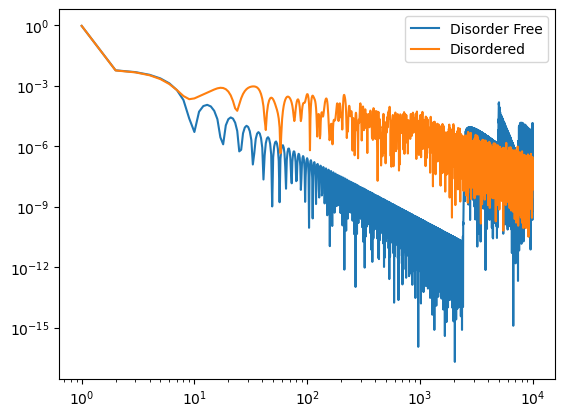

In [ ]:
x=np.arange(1,F_n.shape[1]+1,1)
plt.plot(x,F_n[0],label='Disorder Free')
plt.plot(x,F_n[1],label='Disordered')
plt.yscale('log')
plt.xscale('log')
plt.legend()